In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("../incl/")

import ELPH_utils
import ELPH_dyn
import ELPH_Scaler
import ELPH_Optimizer
import ELPH_Dim_Reducer
import ELPH_VAR_Transformer

from ELPH_RDNLVAR import RDNLVAR

In [9]:
runs = ELPH_utils.load_runs(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

# runs = runs[::10]
# for k in range(len(runs)):
#     runs[k] = runs[k][:,::2]

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

test_run = ELPH_utils.load_runs(filename='/home/agluedge/Preprints/ELPH/example_run.npz')[0]
print('example run loaded with shape: ', test_run.shape)

1000 loaded with n_kmax = 200
example run loaded with shape:  (200, 400)


In [10]:
model = RDNLVAR(runs)

dim_reducer = ELPH_Dim_Reducer.SVD()
VAR_transformer = ELPH_VAR_Transformer.polynomial_features(order=2)

def get_score(aExp, rel_scale):
    alpha = 10.0**aExp
    
    scaler = ELPH_Scaler.normalize_scaler(rel_scale)
    optimizer = ELPH_Optimizer.ridge(alpha=alpha)

    train_kwargs = {'rdim':20, 'prdim':20, 'n_VAR_steps':2, 'intercept':True, 'full_hist':False, 'optimizer':optimizer, 'scaler':scaler, 'dim_reducer':dim_reducer, 'VAR_transformer':VAR_transformer }
    score_kwargs = {'norm':'std'}
    
    m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=10, seed=817, score_kwargs=score_kwargs, train_kwargs=train_kwargs)
    
    r = m + np.std(s)
    return r


n = 30

scores = np.zeros((n,n))

aExpAr = np.linspace(-5,-1,n)
rsAr = np.linspace(0.1,1.0,n)


for n,aExp in enumerate(aExpAr):
    for m,rs in enumerate(rsAr):
        scr = get_score(aExp,rs)
        print('indices n,m:',n,',',m, 'aExp:', aExp, 'rs:', rs, 'score:', scr)
        scores[n,m] = scr

indices n,m: 0 , 0 aExp: -5.0 rs: 0.1 score: nan
indices n,m: 0 , 1 aExp: -5.0 rs: 0.1310344827586207 score: nan
indices n,m: 0 , 2 aExp: -5.0 rs: 0.16206896551724137 score: nan
indices n,m: 0 , 3 aExp: -5.0 rs: 0.19310344827586207 score: nan
indices n,m: 0 , 4 aExp: -5.0 rs: 0.22413793103448276 score: nan
indices n,m: 0 , 5 aExp: -5.0 rs: 0.25517241379310346 score: nan
indices n,m: 0 , 6 aExp: -5.0 rs: 0.28620689655172415 score: nan
indices n,m: 0 , 7 aExp: -5.0 rs: 0.3172413793103448 score: nan
indices n,m: 0 , 8 aExp: -5.0 rs: 0.34827586206896555 score: nan
indices n,m: 0 , 9 aExp: -5.0 rs: 0.3793103448275862 score: nan


../incl/ELPH_Scaler.py:67: RuntimeWarning: overflow encountered in multiply
  return ( ( (data_matrix.T + 0.5*self.rel_scale_vec[:n_features]) * self.scale[:n_features])+self.min[:n_features] ).T
../incl/ELPH_Dim_Reducer.py:33: RuntimeWarning: invalid value encountered in matmul
  return self.U[:,:dim] @ coef_matrix


indices n,m: 0 , 10 aExp: -5.0 rs: 0.41034482758620694 score: nan
indices n,m: 0 , 11 aExp: -5.0 rs: 0.4413793103448276 score: nan
indices n,m: 0 , 12 aExp: -5.0 rs: 0.4724137931034482 score: nan
indices n,m: 0 , 13 aExp: -5.0 rs: 0.503448275862069 score: nan


../incl/ELPH_RDNLVAR.py:197: RuntimeWarning: overflow encountered in matmul
  pred[:,j] = self.w.T @ transform


indices n,m: 0 , 14 aExp: -5.0 rs: 0.5344827586206896 score: nan
indices n,m: 0 , 15 aExp: -5.0 rs: 0.5655172413793104 score: nan
indices n,m: 0 , 16 aExp: -5.0 rs: 0.596551724137931 score: nan
indices n,m: 0 , 17 aExp: -5.0 rs: 0.6275862068965516 score: nan
indices n,m: 0 , 18 aExp: -5.0 rs: 0.6586206896551724 score: nan
indices n,m: 0 , 19 aExp: -5.0 rs: 0.689655172413793 score: nan
indices n,m: 0 , 20 aExp: -5.0 rs: 0.7206896551724138 score: nan
indices n,m: 0 , 21 aExp: -5.0 rs: 0.7517241379310344 score: nan
indices n,m: 0 , 22 aExp: -5.0 rs: 0.7827586206896552 score: nan
indices n,m: 0 , 23 aExp: -5.0 rs: 0.8137931034482758 score: nan
indices n,m: 0 , 24 aExp: -5.0 rs: 0.8448275862068965 score: nan
indices n,m: 0 , 25 aExp: -5.0 rs: 0.8758620689655172 score: nan
indices n,m: 0 , 26 aExp: -5.0 rs: 0.9068965517241379 score: nan
indices n,m: 0 , 27 aExp: -5.0 rs: 0.9379310344827586 score: nan
indices n,m: 0 , 28 aExp: -5.0 rs: 0.9689655172413792 score: nan
indices n,m: 0 , 29 aExp: -

indices n,m: 4 , 3 aExp: -4.448275862068965 rs: 0.19310344827586207 score: nan
indices n,m: 4 , 4 aExp: -4.448275862068965 rs: 0.22413793103448276 score: nan
indices n,m: 4 , 5 aExp: -4.448275862068965 rs: 0.25517241379310346 score: nan
indices n,m: 4 , 6 aExp: -4.448275862068965 rs: 0.28620689655172415 score: nan
indices n,m: 4 , 7 aExp: -4.448275862068965 rs: 0.3172413793103448 score: nan


/usr/lib/python3/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


indices n,m: 4 , 8 aExp: -4.448275862068965 rs: 0.34827586206896555 score: nan
indices n,m: 4 , 9 aExp: -4.448275862068965 rs: 0.3793103448275862 score: nan
indices n,m: 4 , 10 aExp: -4.448275862068965 rs: 0.41034482758620694 score: nan
indices n,m: 4 , 11 aExp: -4.448275862068965 rs: 0.4413793103448276 score: nan
indices n,m: 4 , 12 aExp: -4.448275862068965 rs: 0.4724137931034482 score: nan
indices n,m: 4 , 13 aExp: -4.448275862068965 rs: 0.503448275862069 score: nan
indices n,m: 4 , 14 aExp: -4.448275862068965 rs: 0.5344827586206896 score: nan
indices n,m: 4 , 15 aExp: -4.448275862068965 rs: 0.5655172413793104 score: nan
indices n,m: 4 , 16 aExp: -4.448275862068965 rs: 0.596551724137931 score: nan
indices n,m: 4 , 17 aExp: -4.448275862068965 rs: 0.6275862068965516 score: nan
indices n,m: 4 , 18 aExp: -4.448275862068965 rs: 0.6586206896551724 score: nan
indices n,m: 4 , 19 aExp: -4.448275862068965 rs: 0.689655172413793 score: nan
indices n,m: 4 , 20 aExp: -4.448275862068965 rs: 0.7206

indices n,m: 7 , 23 aExp: -4.0344827586206895 rs: 0.8137931034482758 score: nan
indices n,m: 7 , 24 aExp: -4.0344827586206895 rs: 0.8448275862068965 score: nan
indices n,m: 7 , 25 aExp: -4.0344827586206895 rs: 0.8758620689655172 score: nan
indices n,m: 7 , 26 aExp: -4.0344827586206895 rs: 0.9068965517241379 score: nan
indices n,m: 7 , 27 aExp: -4.0344827586206895 rs: 0.9379310344827586 score: nan
indices n,m: 7 , 28 aExp: -4.0344827586206895 rs: 0.9689655172413792 score: nan
indices n,m: 7 , 29 aExp: -4.0344827586206895 rs: 1.0 score: nan
indices n,m: 8 , 0 aExp: -3.896551724137931 rs: 0.1 score: 0.0065915093706139195
indices n,m: 8 , 1 aExp: -3.896551724137931 rs: 0.1310344827586207 score: nan
indices n,m: 8 , 2 aExp: -3.896551724137931 rs: 0.16206896551724137 score: nan
indices n,m: 8 , 3 aExp: -3.896551724137931 rs: 0.19310344827586207 score: nan
indices n,m: 8 , 4 aExp: -3.896551724137931 rs: 0.22413793103448276 score: nan
indices n,m: 8 , 5 aExp: -3.896551724137931 rs: 0.255172413

indices n,m: 11 , 6 aExp: -3.4827586206896552 rs: 0.28620689655172415 score: nan
indices n,m: 11 , 7 aExp: -3.4827586206896552 rs: 0.3172413793103448 score: nan
indices n,m: 11 , 8 aExp: -3.4827586206896552 rs: 0.34827586206896555 score: nan
indices n,m: 11 , 9 aExp: -3.4827586206896552 rs: 0.3793103448275862 score: nan
indices n,m: 11 , 10 aExp: -3.4827586206896552 rs: 0.41034482758620694 score: nan
indices n,m: 11 , 11 aExp: -3.4827586206896552 rs: 0.4413793103448276 score: nan
indices n,m: 11 , 12 aExp: -3.4827586206896552 rs: 0.4724137931034482 score: nan
indices n,m: 11 , 13 aExp: -3.4827586206896552 rs: 0.503448275862069 score: nan
indices n,m: 11 , 14 aExp: -3.4827586206896552 rs: 0.5344827586206896 score: nan
indices n,m: 11 , 15 aExp: -3.4827586206896552 rs: 0.5655172413793104 score: nan
indices n,m: 11 , 16 aExp: -3.4827586206896552 rs: 0.596551724137931 score: nan
indices n,m: 11 , 17 aExp: -3.4827586206896552 rs: 0.6275862068965516 score: nan
indices n,m: 11 , 18 aExp: -3.4

indices n,m: 14 , 18 aExp: -3.0689655172413794 rs: 0.6586206896551724 score: nan
indices n,m: 14 , 19 aExp: -3.0689655172413794 rs: 0.689655172413793 score: nan
indices n,m: 14 , 20 aExp: -3.0689655172413794 rs: 0.7206896551724138 score: nan
indices n,m: 14 , 21 aExp: -3.0689655172413794 rs: 0.7517241379310344 score: nan
indices n,m: 14 , 22 aExp: -3.0689655172413794 rs: 0.7827586206896552 score: nan
indices n,m: 14 , 23 aExp: -3.0689655172413794 rs: 0.8137931034482758 score: nan
indices n,m: 14 , 24 aExp: -3.0689655172413794 rs: 0.8448275862068965 score: nan
indices n,m: 14 , 25 aExp: -3.0689655172413794 rs: 0.8758620689655172 score: nan
indices n,m: 14 , 26 aExp: -3.0689655172413794 rs: 0.9068965517241379 score: nan
indices n,m: 14 , 27 aExp: -3.0689655172413794 rs: 0.9379310344827586 score: nan
indices n,m: 14 , 28 aExp: -3.0689655172413794 rs: 0.9689655172413792 score: nan
indices n,m: 14 , 29 aExp: -3.0689655172413794 rs: 1.0 score: nan
indices n,m: 15 , 0 aExp: -2.931034482758620

indices n,m: 17 , 28 aExp: -2.6551724137931036 rs: 0.9689655172413792 score: nan
indices n,m: 17 , 29 aExp: -2.6551724137931036 rs: 1.0 score: nan
indices n,m: 18 , 0 aExp: -2.5172413793103448 rs: 0.1 score: 0.00785348596992317
indices n,m: 18 , 1 aExp: -2.5172413793103448 rs: 0.1310344827586207 score: 0.007197658491874686
indices n,m: 18 , 2 aExp: -2.5172413793103448 rs: 0.16206896551724137 score: 0.006753224609896703
indices n,m: 18 , 3 aExp: -2.5172413793103448 rs: 0.19310344827586207 score: 0.006546344770107257
indices n,m: 18 , 4 aExp: -2.5172413793103448 rs: 0.22413793103448276 score: 0.006631363302749736
indices n,m: 18 , 5 aExp: -2.5172413793103448 rs: 0.25517241379310346 score: 0.007584904225819139
indices n,m: 18 , 6 aExp: -2.5172413793103448 rs: 0.28620689655172415 score: nan
indices n,m: 18 , 7 aExp: -2.5172413793103448 rs: 0.3172413793103448 score: nan
indices n,m: 18 , 8 aExp: -2.5172413793103448 rs: 0.34827586206896555 score: nan
indices n,m: 18 , 9 aExp: -2.517241379310

indices n,m: 21 , 6 aExp: -2.103448275862069 rs: 0.28620689655172415 score: 0.006731606234819767
indices n,m: 21 , 7 aExp: -2.103448275862069 rs: 0.3172413793103448 score: 0.007239186398175024
indices n,m: 21 , 8 aExp: -2.103448275862069 rs: 0.34827586206896555 score: nan
indices n,m: 21 , 9 aExp: -2.103448275862069 rs: 0.3793103448275862 score: nan
indices n,m: 21 , 10 aExp: -2.103448275862069 rs: 0.41034482758620694 score: nan
indices n,m: 21 , 11 aExp: -2.103448275862069 rs: 0.4413793103448276 score: nan
indices n,m: 21 , 12 aExp: -2.103448275862069 rs: 0.4724137931034482 score: nan
indices n,m: 21 , 13 aExp: -2.103448275862069 rs: 0.503448275862069 score: nan
indices n,m: 21 , 14 aExp: -2.103448275862069 rs: 0.5344827586206896 score: nan
indices n,m: 21 , 15 aExp: -2.103448275862069 rs: 0.5655172413793104 score: nan
indices n,m: 21 , 16 aExp: -2.103448275862069 rs: 0.596551724137931 score: nan
indices n,m: 21 , 17 aExp: -2.103448275862069 rs: 0.6275862068965516 score: nan
indices n

indices n,m: 24 , 13 aExp: -1.6896551724137931 rs: 0.503448275862069 score: nan
indices n,m: 24 , 14 aExp: -1.6896551724137931 rs: 0.5344827586206896 score: nan
indices n,m: 24 , 15 aExp: -1.6896551724137931 rs: 0.5655172413793104 score: nan
indices n,m: 24 , 16 aExp: -1.6896551724137931 rs: 0.596551724137931 score: nan
indices n,m: 24 , 17 aExp: -1.6896551724137931 rs: 0.6275862068965516 score: nan
indices n,m: 24 , 18 aExp: -1.6896551724137931 rs: 0.6586206896551724 score: nan
indices n,m: 24 , 19 aExp: -1.6896551724137931 rs: 0.689655172413793 score: nan
indices n,m: 24 , 20 aExp: -1.6896551724137931 rs: 0.7206896551724138 score: nan
indices n,m: 24 , 21 aExp: -1.6896551724137931 rs: 0.7517241379310344 score: nan
indices n,m: 24 , 22 aExp: -1.6896551724137931 rs: 0.7827586206896552 score: nan
indices n,m: 24 , 23 aExp: -1.6896551724137931 rs: 0.8137931034482758 score: nan
indices n,m: 24 , 24 aExp: -1.6896551724137931 rs: 0.8448275862068965 score: nan
indices n,m: 24 , 25 aExp: -1.6

indices n,m: 27 , 18 aExp: -1.2758620689655173 rs: 0.6586206896551724 score: nan
indices n,m: 27 , 19 aExp: -1.2758620689655173 rs: 0.689655172413793 score: nan
indices n,m: 27 , 20 aExp: -1.2758620689655173 rs: 0.7206896551724138 score: nan
indices n,m: 27 , 21 aExp: -1.2758620689655173 rs: 0.7517241379310344 score: nan
indices n,m: 27 , 22 aExp: -1.2758620689655173 rs: 0.7827586206896552 score: nan
indices n,m: 27 , 23 aExp: -1.2758620689655173 rs: 0.8137931034482758 score: nan
indices n,m: 27 , 24 aExp: -1.2758620689655173 rs: 0.8448275862068965 score: nan
indices n,m: 27 , 25 aExp: -1.2758620689655173 rs: 0.8758620689655172 score: nan
indices n,m: 27 , 26 aExp: -1.2758620689655173 rs: 0.9068965517241379 score: nan
indices n,m: 27 , 27 aExp: -1.2758620689655173 rs: 0.9379310344827586 score: nan
indices n,m: 27 , 28 aExp: -1.2758620689655173 rs: 0.9689655172413792 score: nan
indices n,m: 27 , 29 aExp: -1.2758620689655173 rs: 1.0 score: nan
indices n,m: 28 , 0 aExp: -1.137931034482759

In [13]:
# np.savetxt('/home/agluedge/Preprints/ELPH/figs/poly_features_opt/scores', scores)

0.006479674583854854
270
(9, 0)
0.006479674583854854


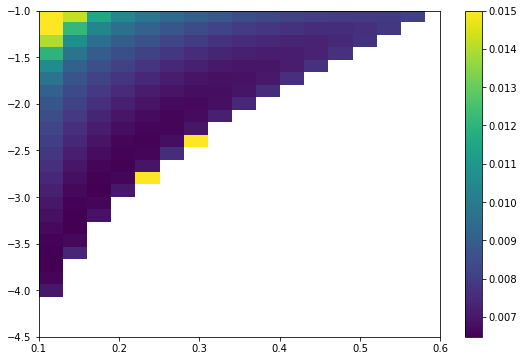

/tmp/ipykernel_53691/691199227.py:26: RuntimeWarning: All-NaN slice encountered
  minar = np.nanmin(scores, axis=0)


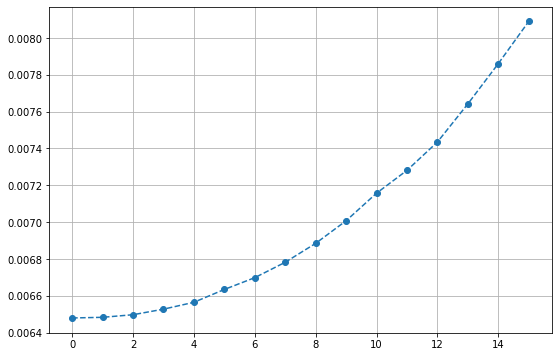

In [49]:
scores = np.loadtxt('/home/agluedge/Preprints/ELPH/figs/poly_features_opt/scores')

scrs = scores.copy()
for k in range(scrs.size):
    if np.isnan(scrs.flat[k]):
        scrs.flat[k] = 1

print(np.nanmin(scrs))
print(np.argmin(scrs))

minind = np.unravel_index(np.argmin(scrs), scrs.shape)
print(minind)
print(scrs[minind])

# scores[minind] = 1.0


extent = [0.1,1.0,-5,-1]
plt.imshow(scores, origin='lower', interpolation='none', aspect='auto', vmax=0.015, extent=extent)
plt.colorbar()
plt.xlim(0.1,0.6)
plt.ylim(-4.5,-1.0)
plt.show()


minar = np.nanmin(scores, axis=0)
plt.grid()
plt.plot(range(30),minar,'--',marker='o')
# plt.ylim(0,0.01)
plt.show()


[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [ 9. 13. 15. 17. 19. 20. 22. 23. 24. 25. 26. 26. 27. 28. 28. 29.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  2.  2.  3.
   3.  4.  4.  5.  6.  7.  7.  8.  9. 11. 12. 13.]]


<IPython.core.display.Javascript object>


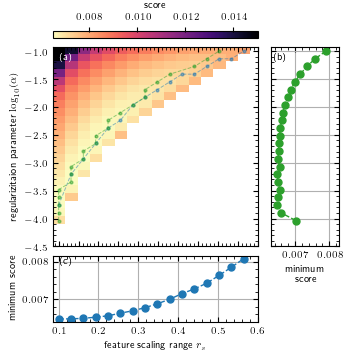

In [159]:
%matplotlib notebook


scores = np.loadtxt('/home/agluedge/Preprints/ELPH/figs/poly_features_opt/scores')

ny,nx = scores.shape

xmin = 0.1
xmax = 1.0

ymin = -5
ymax = -1

y = np.linspace(ymin,ymax,ny)
x = np.linspace(xmin,xmax,nx)

dx = (xmax-xmin)/(nx-1)/2
dy = (ymax-ymin)/(ny-1)/2

extent = [xmin-dx,xmax+dx,ymin-dy,ymax+dy]


scrs = scores.copy()
for k in range(scrs.size):
    if np.isnan(scrs.flat[k]):
        scrs.flat[k] = 1


yminAr = np.amin(scrs, axis=1)
xminAr = np.amin(scrs, axis=0)

yminAr = np.ma.masked_greater(yminAr, 0.15)
xminAr = np.ma.masked_greater(xminAr, 0.15)

scores = np.ma.masked_greater(scores, 0.15)


xlim_min = xmin-dx
xlim_max = 0.6

ylim_min = -4.5
ylim_max = ymax + dy



min_inds = np.zeros((2,nx))

for n in range(nx):
    min_inds[:,n] = np.array([n,np.argmin(scrs[:,n])])

print(min_inds)

minpos_x = xmin + min_inds[0]*dx*2
minpos_y = ymin + min_inds[1]*dy*2

minpos_y = np.ma.masked_where(min_inds[1] < 0.5, minpos_y)



min_inds_y = np.zeros((2,ny))

for n in range(ny):
    min_inds_y[:,n] = np.array([n,np.argmin(scrs[n])])

print(min_inds_y)

minpos_x_y = xmin + min_inds_y[1]*dx*2
minpos_y_y = ymin + min_inds_y[0]*dy*2

minpos_x_y = np.ma.masked_where(np.amin(scrs, axis=1) > 0.5, minpos_x_y)




####################################################
####################################################
####################################################

# from matplotlib import rc
# rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,3.5))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=3, ncols=2, width_ratios=[3,1], height_ratios=[0.1,3,1])



####################################################
####################################################
####################################################




ax00 = plt.subplot(gs[1,0])

im = plt.imshow(scores, origin='lower', interpolation='none', aspect='auto', vmax=0.015, extent=extent, cmap='magma_r')
# plt.colorbar()

plt.plot(minpos_x, minpos_y, '--', marker='o', lw = 0.7, ms = 2, alpha=0.5)

plt.plot(minpos_x_y, minpos_y_y, '--', c='C2', marker='o', lw = 0.7, ms = 2, alpha=0.5)

    
plt.ylabel(r'regularizitaion parameter $\log_{10}(\alpha)$')

plt.xlim(xlim_min, xlim_max)
plt.ylim(ylim_min, ylim_max)


ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
ax00.xaxis.set_major_formatter(ticker.NullFormatter())
ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# ax00.yaxis.set_minor_formatter(ticker.NullFormatter())


plt.text(0.03, 0.97,r'(a)', color='w', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


axCB = plt.subplot(gs[0,0])

cb = plt.colorbar(im, cax = axCB, orientation='horizontal')
cb.set_label(r"score")
cb.ax.xaxis.set_ticks_position("top")
cb.ax.xaxis.set_label_position('top')

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[1,1])


plt.grid(0.5)

plt.plot(yminAr, y, '--', c='C2', marker='o', lw = 1.0, ms = 5)


plt.xlabel('minimum\nscore')
# plt.ylabel(r'regularizitaion parameter $\log_{10}(\alpha)$')

plt.xlim(0.0063,0.0083)
plt.ylim(ylim_min, ylim_max)
    
ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.001))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.0002))
# # ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# # ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax00.yaxis.set_major_formatter(ticker.NullFormatter())
ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################

ax00 = plt.subplot(gs[2,0])


plt.grid()
plt.plot(x, xminAr, '--', marker='o', lw = 1.0, ms = 5)

plt.xlabel(r'feature scaling range $r_s$')
plt.ylabel('minimum score')

plt.xlim(xlim_min, xlim_max)

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))
# # ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# # ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.001))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.0002))
# #ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# #ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(c)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


####################################################
####################################################
####################################################

plt.tight_layout()

plt.subplots_adjust(left=0.15, bottom=0.08, right=0.97, top=0.91, wspace=0.1, hspace=0.1)

plt.savefig('/home/agluedge/Preprints/ELPH/figs/poly_opt.pdf', dpi=600)
plt.show()


